# EE386 Digital Signal Processing
## Experiment 7 

In [ ]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [ ]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [ ]:
#Roll number: 191EE114
alpha = 1 + 114 % 3  
print(alpha)

1


## Problem 1

In [70]:
# Window
M = 11
t = np.linspace(0,3*pi,num = M)

rec = sp.get_window('boxcar', M)
han = sp.get_window('hanning', M)
ham = sp.get_window('hamming', M)

Text(0.5, 1.0, 'Hamming Window in Time Domain')

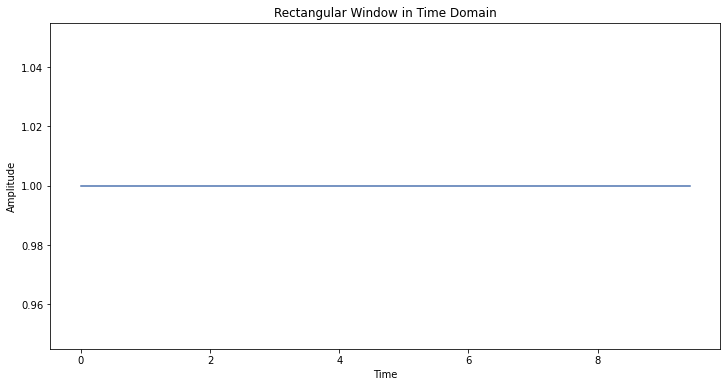

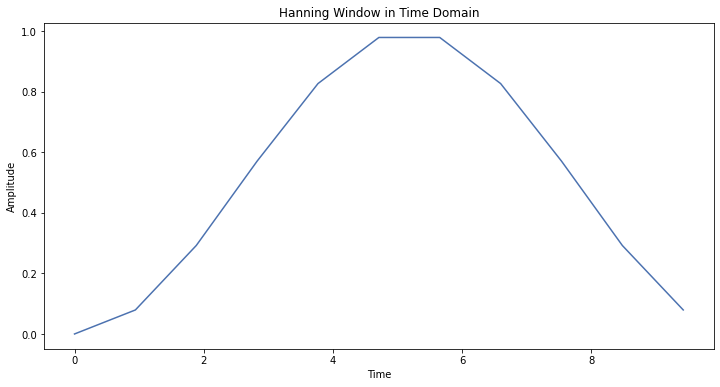

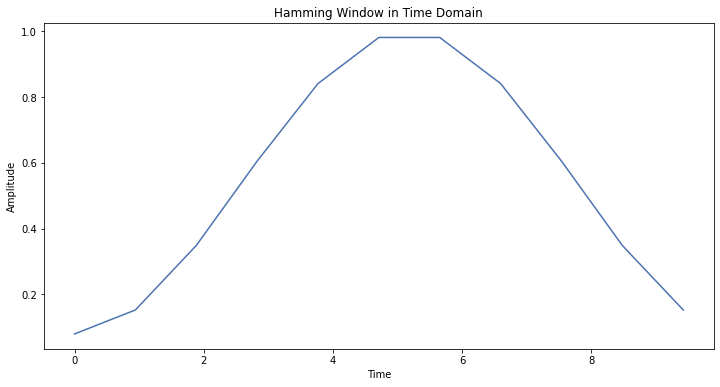

In [72]:
plt.plot(t,rec, label = 'Rectangular Window')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Rectangular Window in Time Domain")
plt.figure()

plt.plot(t,han,label = 'Hanning Window')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Hanning Window in Time Domain")
plt.figure()

plt.plot(t,ham,label = 'Hamming Window')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Hamming Window in Time Domain")

In [73]:
def plot_bode(frequency, mag,title=None,x_label=None,y_label=None,row= None):
    
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 
    

    axs[row].set_title(title, fontsize = 15)
    axs[row].set_xlabel(x_label, fontsize = 15)
    axs[row].set_ylabel(y_label, fontsize = 15)
    axs[row].tick_params(axis="both", labelsize = 15)

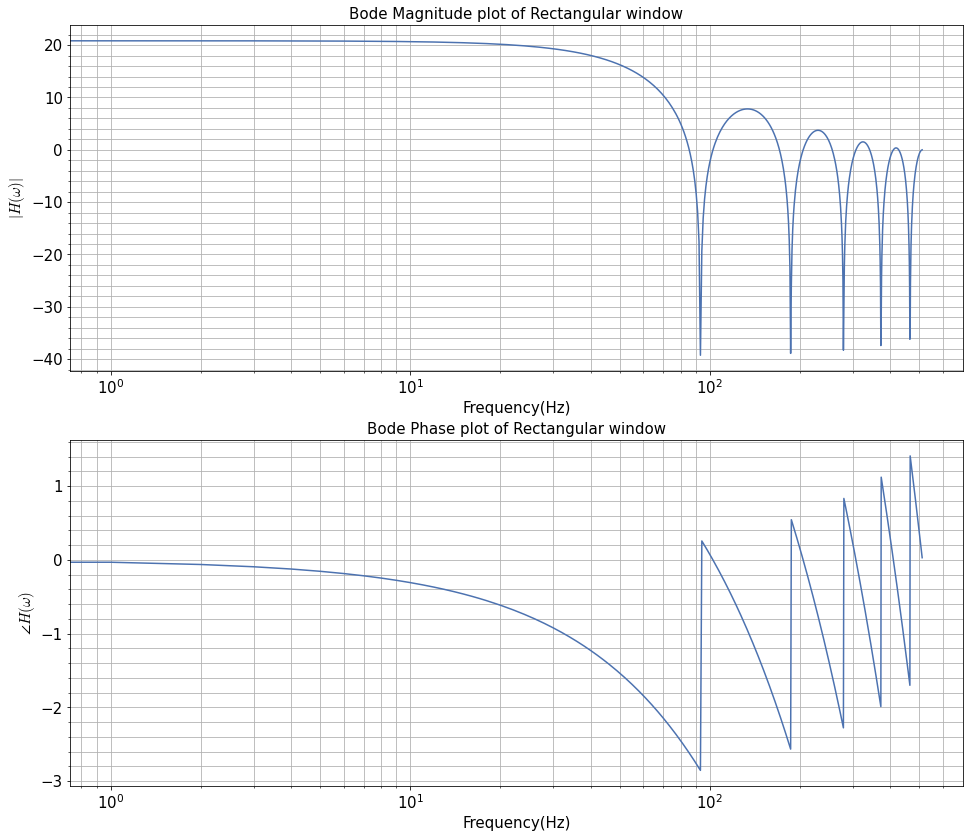

In [74]:
freq, mag = sp.freqz(rec, 1)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of Rectangular window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of Rectangular window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

## Problem 2

Length of the filter : 21

cutoff frequency: $w_c = \frac{\pi}{\alpha + 1} rad/sample$

$\implies  w_c = \frac{\pi}{2} rad/sample$ 

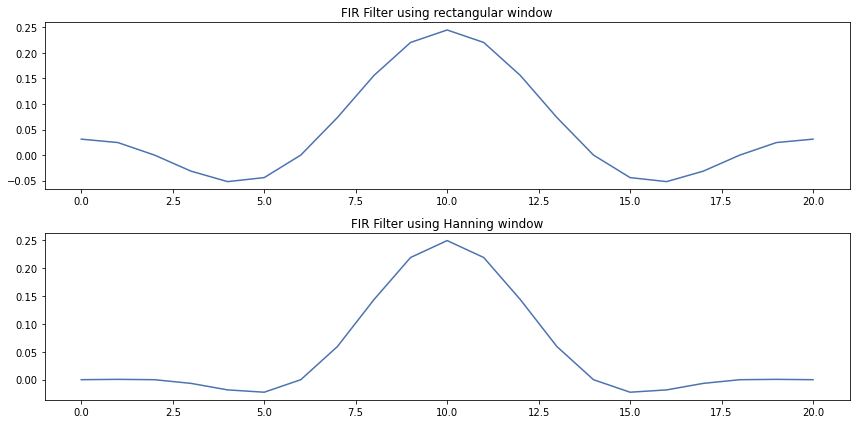

In [ ]:
plt.figure()

plt.subplot(2, 1, 1)
# Using Rectangular Window
rectFilter = sp.firwin(numtaps = 21, cutoff = 1/4, window = 'boxcar', pass_zero = 'lowpass')
plt.plot(rectFilter)
plt.title('FIR Filter using rectangular window')

plt.subplot(2, 1, 2)
# Using Hanning Window
hanningFilter = sp.firwin(numtaps = 21, cutoff = 1/4, window = 'hanning', pass_zero = 'lowpass')
plt.plot(hanningFilter)
plt.title('FIR Filter using Hanning window')

plt.tight_layout()

In [ ]:
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title[row])
    axs[row].set_xlabel(xaxis_label)
    axs[row].set_ylabel(yaxis_label)
    axs[row].tick_params(axis="both")
    fig.tight_layout()

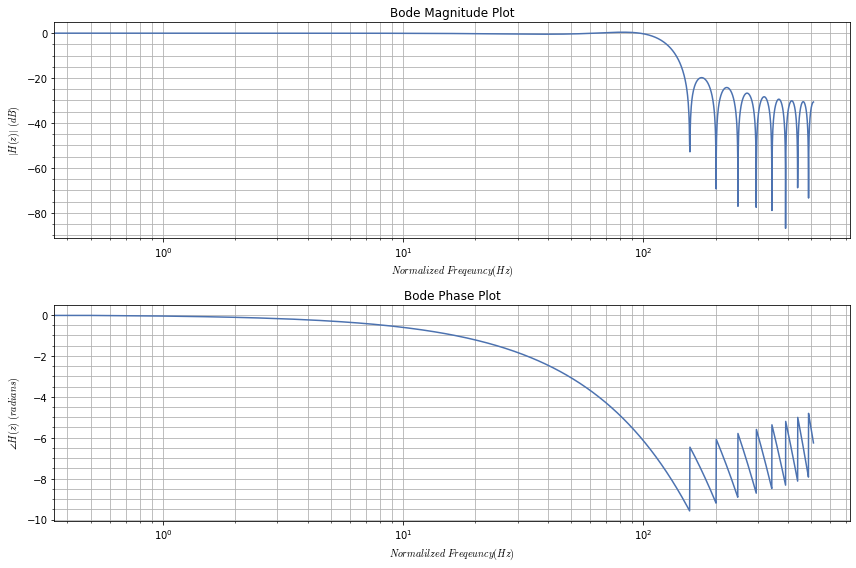

In [ ]:
Fs = 1024
freq, mag = sp.freqz(rectFilter, 1, Fs)

title = ['Bode Magnitude Plot', 'Bode Phase Plot']
fig, axs = plt.subplots(2, figsize=(12, 8))
plot_signal(freq, mag, xaxis_label=r'$Normalized\ Freqeuncy(Hz)$', yaxis_label=r'$|H(z)|\ (dB)$', row=0)
plot_signal(freq, mag, xaxis_label=r'$Normalilzed\ Freqeuncy(Hz)$', yaxis_label=r'$\angle H(z)\ (radians)$', row=1)

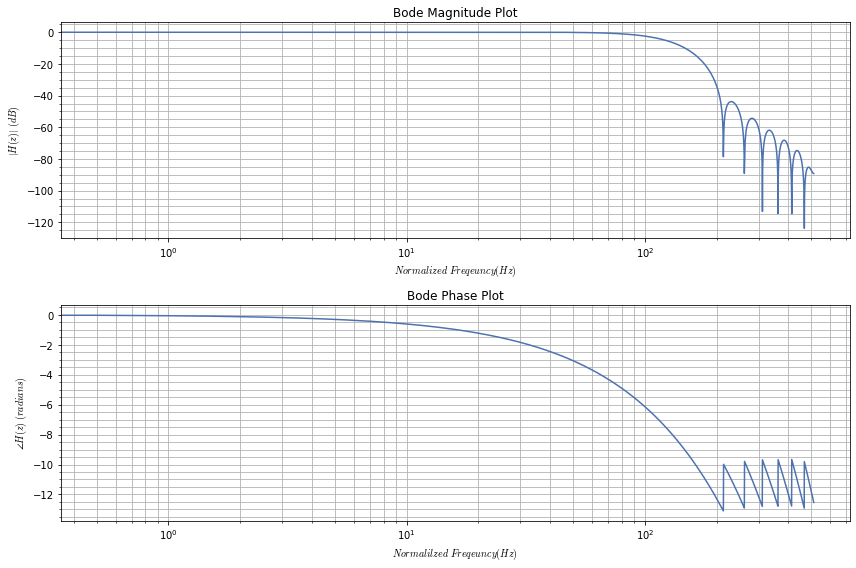

In [ ]:
freq, mag = sp.freqz(hanningFilter, 1, Fs)

title = ['Bode Magnitude Plot', 'Bode Phase Plot']
fig, axs = plt.subplots(2, figsize=(12, 8))
plot_signal(freq, mag, xaxis_label=r'$Normalized\ Freqeuncy(Hz)$', yaxis_label=r'$|H(z)|\ (dB)$', row=0)
plot_signal(freq, mag, xaxis_label=r'$Normalilzed\ Freqeuncy(Hz)$', yaxis_label=r'$\angle H(z)\ (radians)$', row=1)

## Problem 3

In [ ]:
Fs_instru, track= wavfile.read('instru1.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs_instru))
print('Size of instrument signal: {}'.format(track.shape))
IPython.display.Audio(track, rate = Fs_instru)

Sampling rate of instrument : 11025Hz
Size of instrument signal: (36250,)


In [ ]:
def plot_spectro(x, Fs, Window,samples, Nperseg, Noverlap):
    
    ft, tx, Sx = sp.spectrogram(x,Fs, window = Window,nperseg = Nperseg, noverlap = Noverlap)
    
    if samples:
        plt.pcolormesh(tx[0:samples],ft[0:samples], Sx[0:samples][0:samples], shading = 'gouraud')
    else:
        plt.pcolormesh(tx,ft,Sx, shading = 'gouraud')
        
    cbar = plt.colorbar()
    cbar.set_label('Amplitude')
    cbar.minorticks_on()
    plt.xlabel("Time(sec)")
    plt.ylabel("Frequency(Hz)")
    
    return tx,ft,Sx

Text(0.5, 1.0, 'Spectrogram of the instrument audio track')

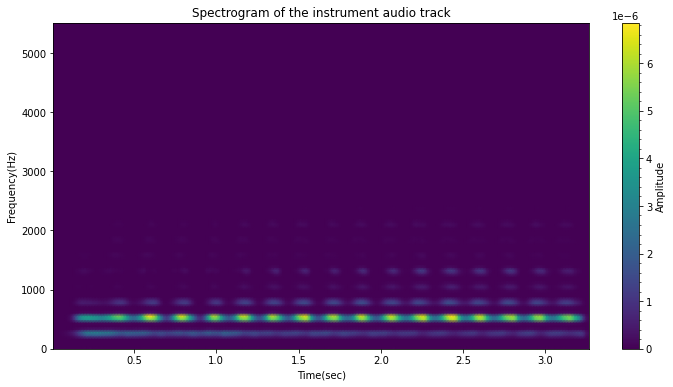

In [ ]:
t,f,S = plot_spectro(track, Fs = Fs_instru, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the instrument audio track")

In [ ]:
peak, _= sp.find_peaks(S[:,10],threshold = 1e-8)
print("Frequencies present:",f[peak])

Frequencies present: [ 275.625  551.25   771.75  1047.375 1323.    1598.625 2094.75 ]


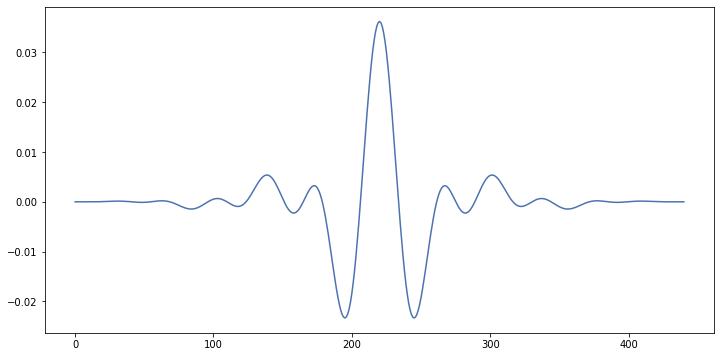

In [ ]:
filter_instru = sp.firwin(numtaps=441, cutoff=[100, 300], window='hanning', pass_zero='bandpass', fs = 11025)
plt.plot(filter_instru)

In [ ]:
track_filtered = sp.lfilter(filter_instru, 1, track)

Text(0.5, 1.0, 'Spectrogram of the instrument audio track')

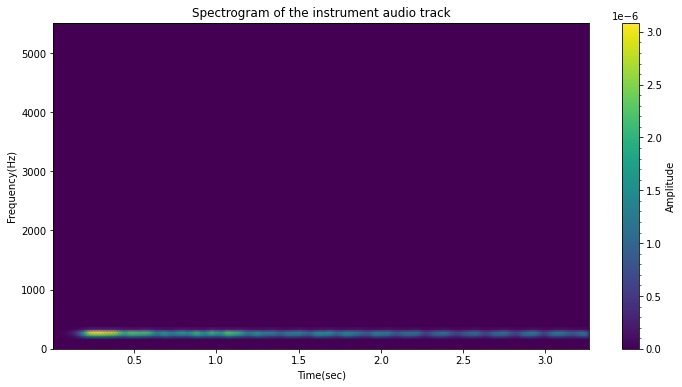

In [ ]:
t,f,S = plot_spectro(track_filtered, Fs = Fs_instru, Window = 'hanning',samples = None,Nperseg = 200,Noverlap = 10)
plt.title("Spectrogram of the instrument audio track")

In [ ]:
wavfile.write("filtered_track.wav", Fs, track_filtered)
IPython.display.Audio(track_filtered, rate = Fs)

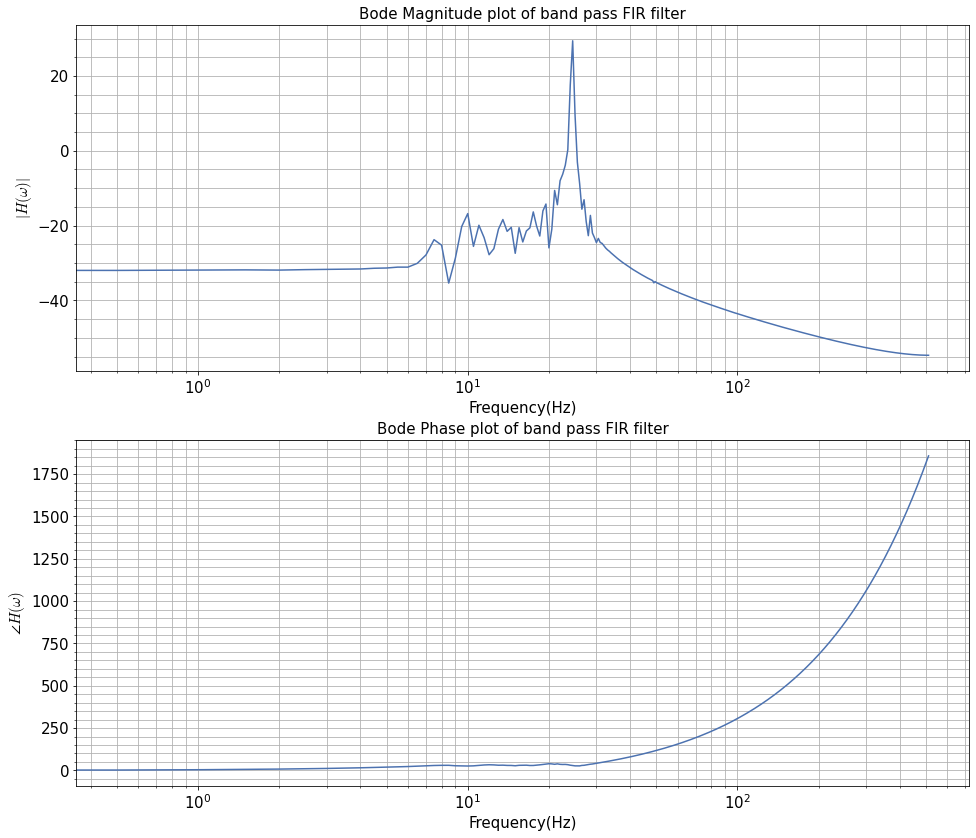

In [75]:
freq, mag = sp.freqz(track_filtered, 1, 1024)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of band pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of band pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

## Problem 4

In [77]:
t= np.linspace(0, 2*pi, num = 1024)
y = np.cos(2*pi*0.5*t) + 0.2*np.sin(2*pi*2.5*t+0.1) + 0.2*np.sin(2*pi*15.3*t) + 0.1*np.sin(2*pi*16.7*t + 0.1) +  0.1*np.sin(2*pi*23.45*t+.8)

ham = sp.get_window('hanning', 11)
low_pass_ham = sp.firwin(numtaps = 11 , cutoff = 100 , window='hanning', pass_zero='lowpass', fs = 1000)

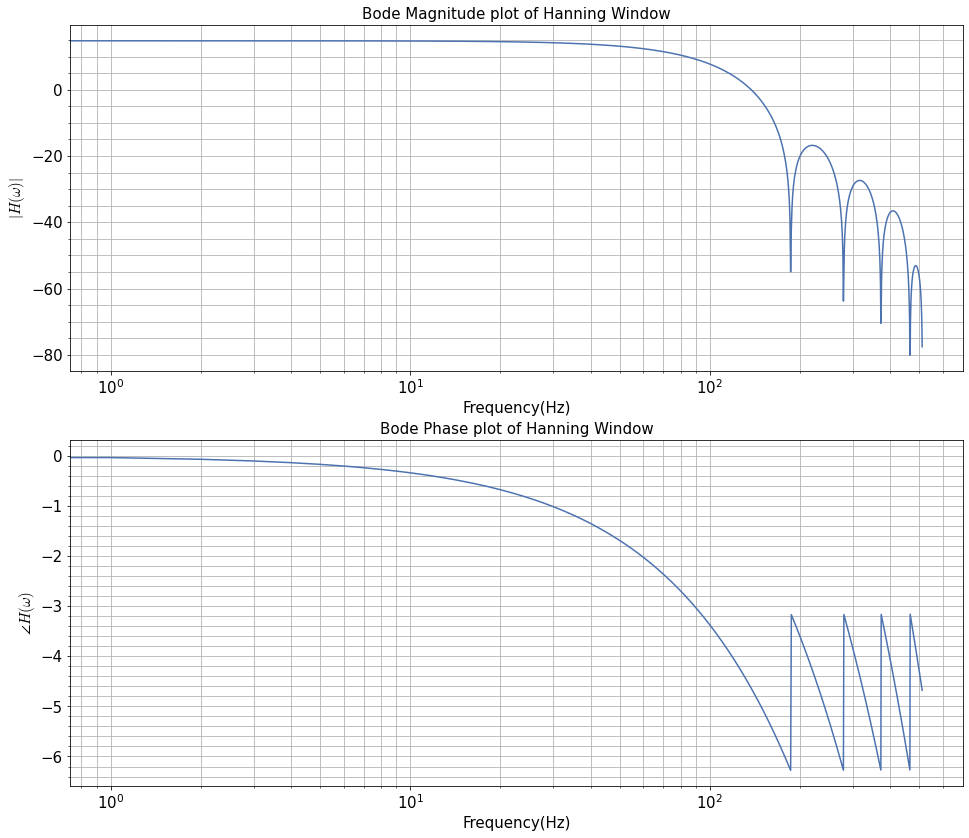

In [78]:
freq, mag = sp.freqz(ham, 1)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of Hanning Window", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of Hanning Window", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)

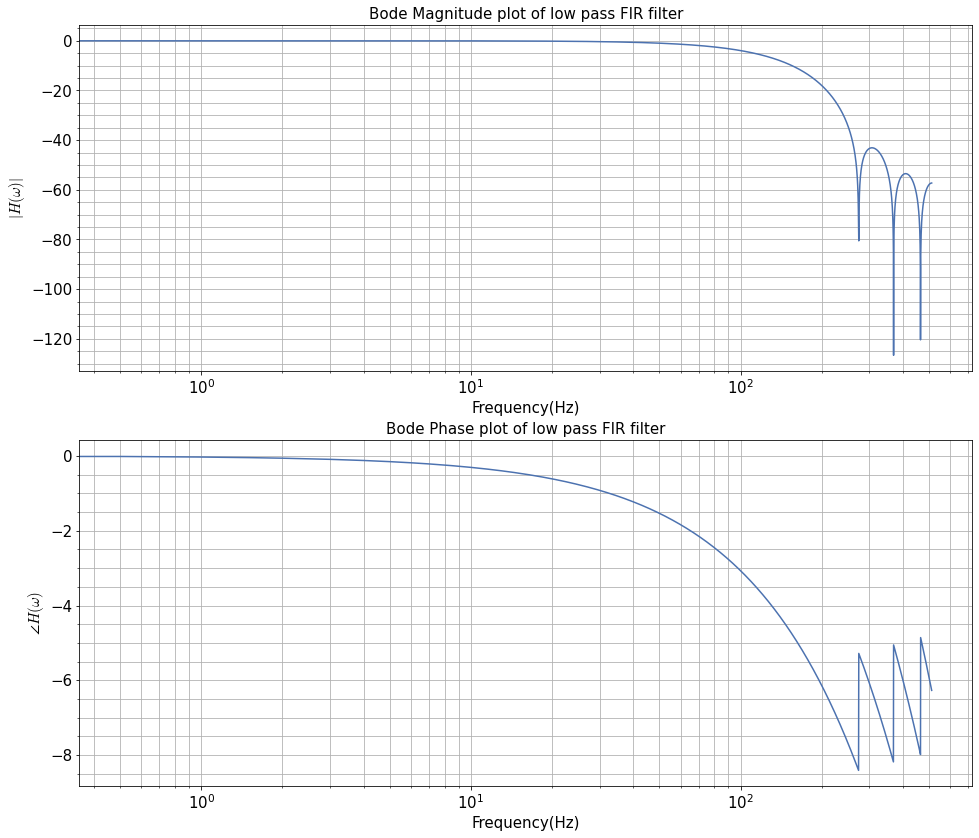

In [79]:
freq, mag = sp.freqz(low_pass_ham, 1, 1024)
fig, axs = plt.subplots(2, figsize = (16,14))
    
plot_bode(freq,mag,title = "Bode Magnitude plot of low pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$|H(\omega)|$",row = 0)
plot_bode(freq,mag,title = "Bode Phase plot of low pass FIR filter", x_label = "Frequency(Hz)",y_label = r"$\angle H(\omega)$",row = 1)